<a href="https://colab.research.google.com/github/annisasofiaalbana/IPSDKelompok9/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering DBSCAN

## Import Library

In [18]:
!pip install matplotlib-venn

In [19]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [20]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [21]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [22]:
!pip install cartopy
import cartopy

In [23]:
!pip install kneed

In [24]:
!pip install plotly

In [25]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

## Import Data

In [26]:
Data1 = pd.read_csv("/content/1- mental-illnesses-prevalence.csv")
df = pd.DataFrame(Data1)

## Mengakategorikan Data

In [27]:
def describe(df):


    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []


    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())

    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })

    return output

In [28]:
df = df.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia',
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating'})

In [29]:
print(describe(df))

        variable    dtype  count  unique  missing value
0         Entity   object   6420     214              0
1           Code   object   6420     206            270
2           Year    int64   6420      30              0
3  Schizophrenia  float64   6420    6406              0
4     Depressive  float64   6420    6416              0
5        Anxiety  float64   6420    6417              0
6        Bipolar  float64   6420    6385              0
7         Eating  float64   6420    6417              0


In [30]:
num_cols = ["Schizophrenia", "Depressive", "Anxiety", "Bipolar", "Eating"]
cat_cols = ["Entity", "Code"]

## Fitur

Dalam Data ini terdapat 5 variabel yaitu : Schizophrenia, Depressive, Anxiety, Bipolar and Eating

In [31]:
df

,Entity,Code,Year,Schizophrenia,Depressive,Anxiety,Bipolar,Eating
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


## Korelasi Untuk Mencari Fitur

Matriks Korelasi Numerik
               Schizophrenia  Depressive  Anxiety  Bipolar  Eating
Schizophrenia          1.000      -0.475    0.304    0.122   0.501
Depressive            -0.475       1.000    0.114    0.153  -0.052
Anxiety                0.304       0.114    1.000    0.576   0.595
Bipolar                0.122       0.153    0.576    1.000   0.678
Eating                 0.501      -0.052    0.595    0.678   1.000


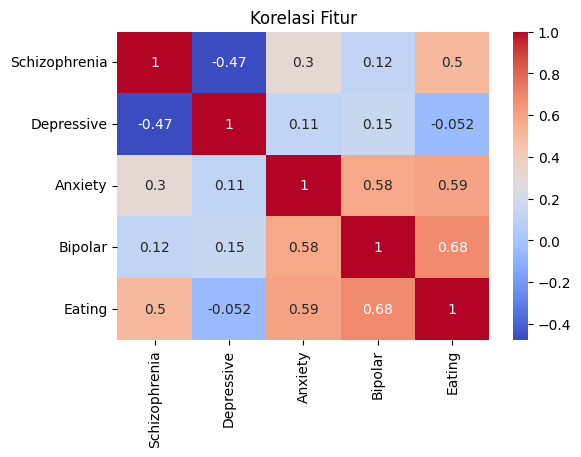

In [32]:
corr_matrix = df[num_cols].corr().round(3)
print("Matriks Korelasi Numerik")
print(corr_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur")
plt.show()

In [33]:
price_corr = corr_matrix["Eating"].drop("Eating")
selected_feature = price_corr.abs().idxmax()
print(f"Fitur yang dipilih berdasarkan korelasi terbesar dengan Eating : {selected_feature}")

Fitur yang dipilih berdasarkan korelasi terbesar dengan Eating : Bipolar


In [34]:
features = ['Schizophrenia', 'Depressive','Anxiety','Bipolar','Eating']

## DBSCAN

In [35]:
cluster_DB = DBSCAN(eps = 0.55, min_samples = 4).fit(df[features])
labels_dB = cluster_DB.labels_
set(cluster_DB.labels_)

{np.int64(0), np.int64(1), np.int64(2)}

Text(0.5, 1.0, 'With clustering')

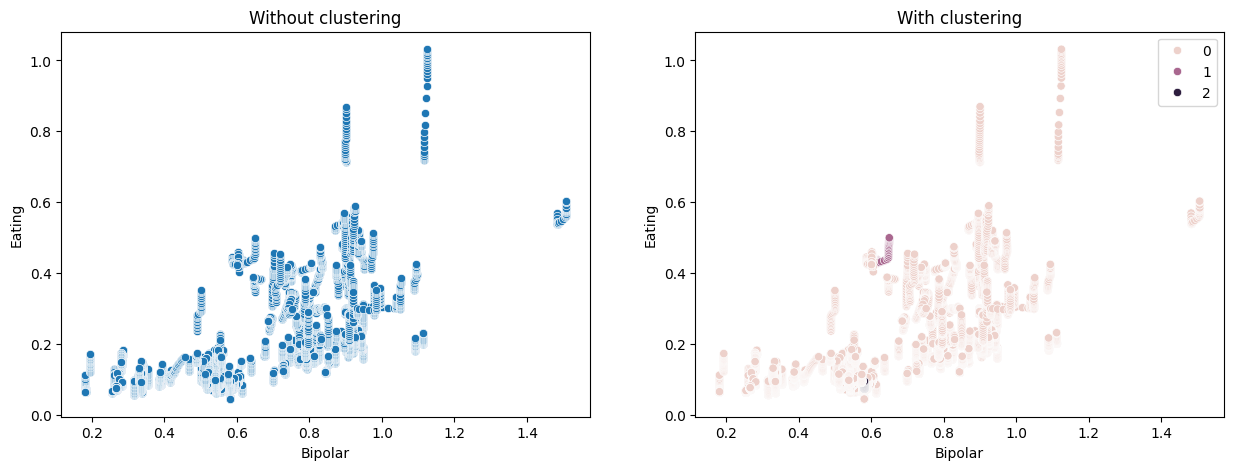

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Bipolar',
                y='Eating').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Bipolar',
                y='Eating', hue=labels_dB).set_title('With clustering')

DBSCAN mengidentifikasi 3 cluster :
Cluster 0 = mayoritas titik (warna merah muda),
Cluster 1 = sekelompok kecil titik yang lebih terpusat (warna ungu), dan
Cluster 2 = beberapa titik outlier (warna hitam tua)

DBSCAN menunjukkan bahwa :
Cluster 0 adalah klaster utama yang memiliki kepadatan tinggi,
Cluster 1 adalah kelompok kecil dengan karakteristik berbeda (nilai Bipolar dan Eating lebih terpusat), dan
Cluster 2 adalah outlier yang tidak cocok dengan pola klaster utama

NB : Cluster 2 terdeteksi sebagai noise/outliers, sesuai karakteristik DBSCAN.

DBSCAN berhasil mengekstrak klaster meskipun secara visual awal tampak sulit,iIni menunjukkan bahwa DBSCAN efektif dalam menemukan kepadatan lokal.

Sebagian besar data berada dalam satu cluster besar (Cluster 0), menandakan data Anda secara keseluruhan cukup homogen.

Terdapat cluster kecil (Cluster 1), menandakan ada sekelompok individu dengan pola Bipolar vs Eating yang berbeda dari mayoritas.

Beberapa titik diidentifikasi sebagai outlier (Cluster 2), ini memberi insight bahwa beberapa data memiliki perilaku ekstrem atau tidak mengikuti pola umum.

## Fitur Lain

Text(0.5, 1.0, 'With clustering')

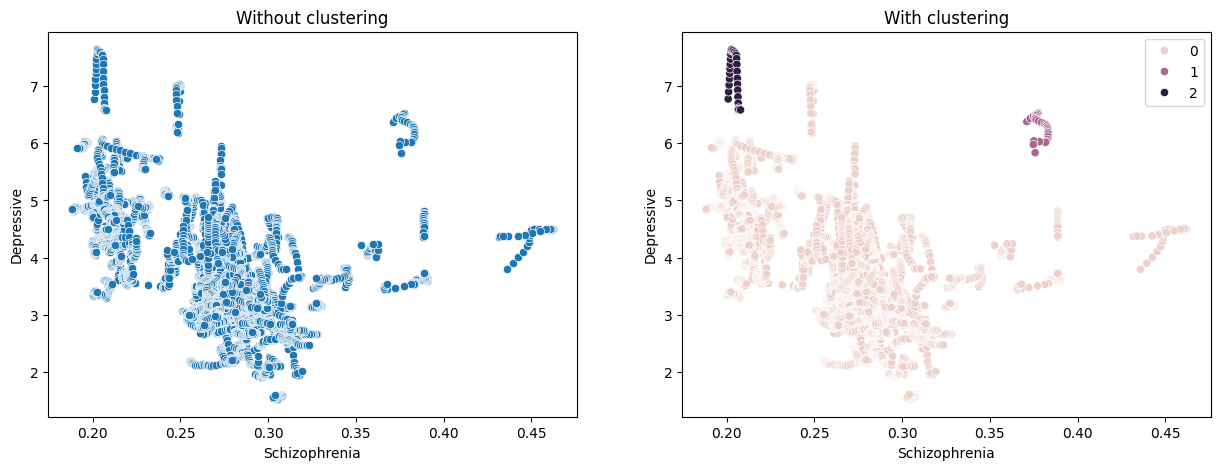

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Schizophrenia',
                y='Depressive').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Schizophrenia',
                y='Depressive', hue=labels_dB).set_title('With clustering')

Text(0.5, 1.0, 'With clustering')

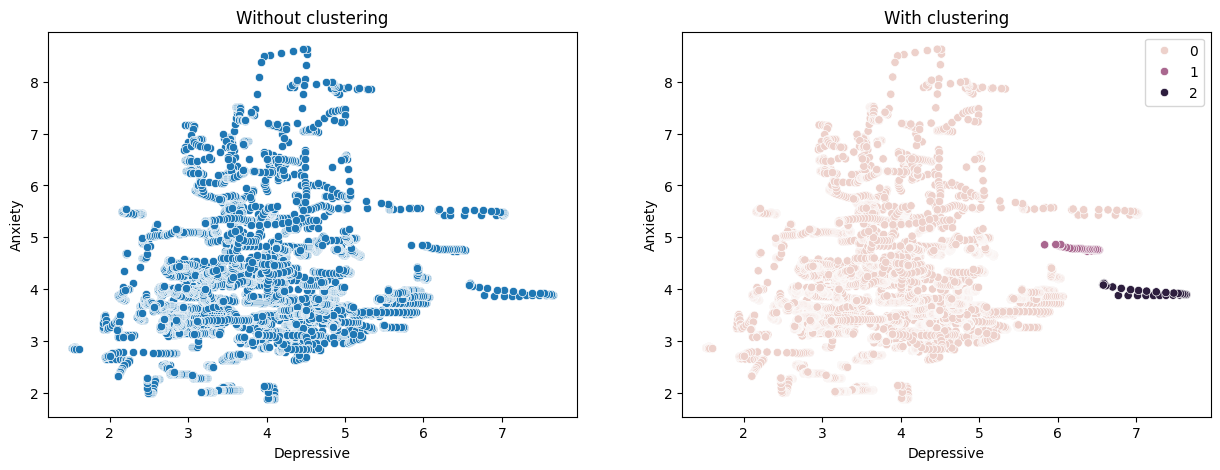

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Depressive',
                y='Anxiety').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Depressive',
                y='Anxiety', hue=labels_dB).set_title('With clustering')


Text(0.5, 1.0, 'With clustering')

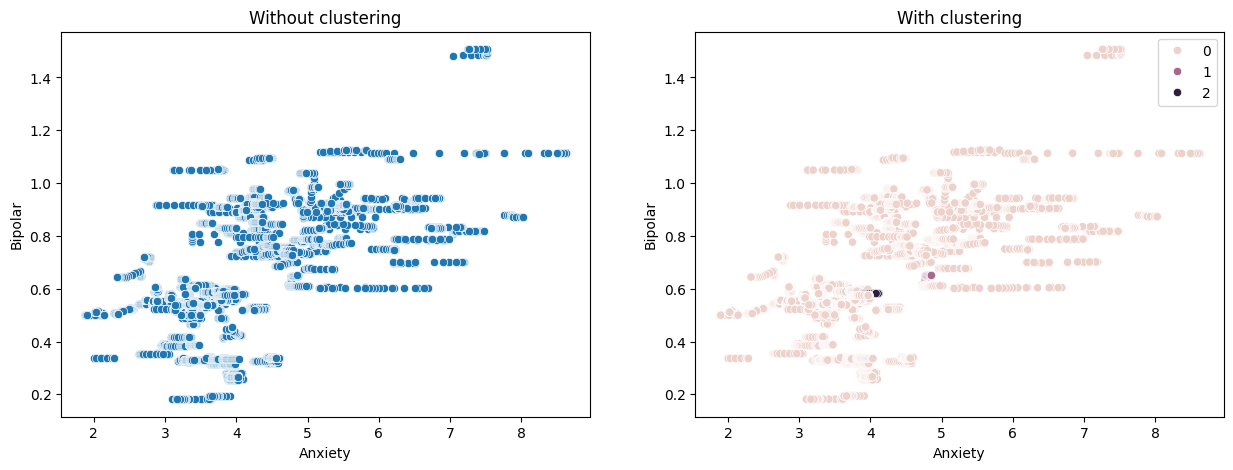

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Anxiety',
                y='Bipolar').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Anxiety',
                y='Bipolar', hue=labels_dB).set_title('With clustering')

Text(0.5, 1.0, 'With clustering')

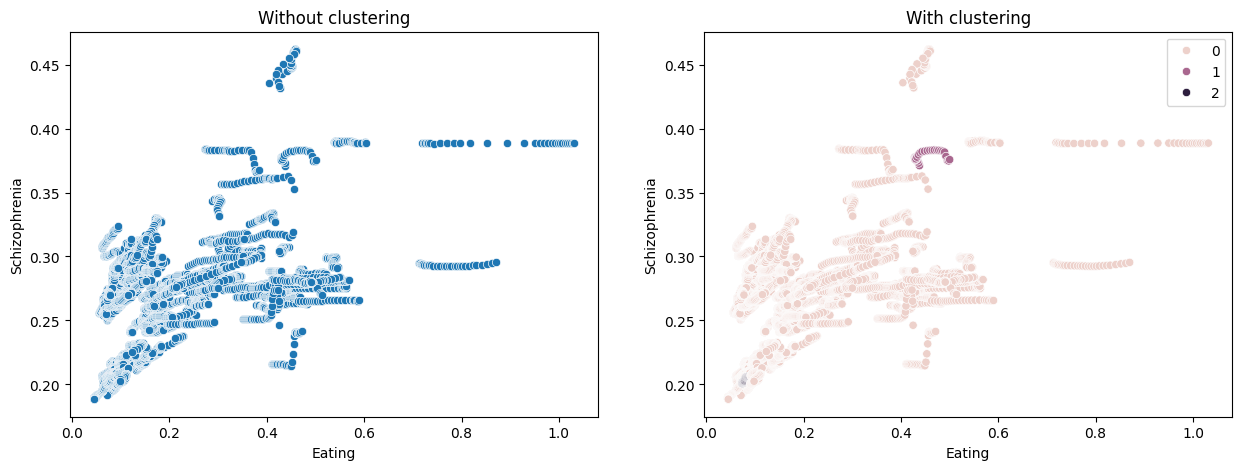

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Eating',
                y='Schizophrenia').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Eating',
                y='Schizophrenia', hue=labels_dB).set_title('With clustering')